In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [2]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'user.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
print(df.shape)
df.head()

(1637138, 22)


,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,0,2,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,0,0,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,0,0,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,0,1,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,0,25,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [5]:
df.tail()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
1637133,4.5,0,0,0,0,0,0,0,0,0,0,0,0,,0,None,0,Jiaxin,2,0,oC4BjbB4I-wx5KBAO1k2Gg,2016-02-24 19:28:47
1637134,4.0,0,0,0,0,0,0,0,0,0,0,0,0,,0,None,0,Wes,8,0,LKd_-BT2GMWp8_1ho18kOg,2017-02-25 23:34:05
1637135,3.4,0,0,0,0,0,0,0,0,0,0,0,0,,0,None,0,Lee,4,8,ib_elCBhGOamS0AALkh4Og,2009-08-19 22:08:16
1637136,3.0,0,0,0,0,0,0,0,0,0,0,0,0,,0,None,0,Melissa,1,1,WV27LoSFDG_YmiDKTLKKLA,2018-10-15 17:07:43
1637137,5.0,0,0,0,0,0,0,0,0,0,0,0,0,,0,None,0,Erin,1,0,agVqH9xDhNw8n7ve66H1Uw,2016-03-03 21:56:06


In [6]:
import seaborn as sns

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


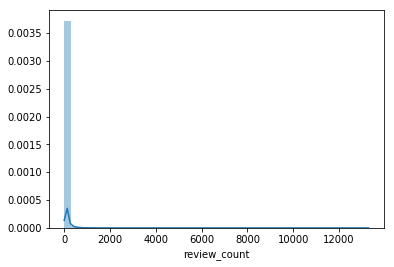

In [7]:
sns.distplot(df['review_count'])

In [8]:
def count_friends(text):
    return len(text.split(','))

In [9]:
df['no_friends'] = df['friends'].apply(lambda x: count_friends(x))

In [10]:
df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since,no_friends
0,4.03,1,0,1,2,0,0,1,0,1,0,2,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33,99
1,3.63,1,0,1,1,0,0,0,0,0,0,0,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06,1152
2,3.71,0,0,0,0,0,0,1,0,0,0,0,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10,15
3,4.85,0,0,0,1,0,0,0,0,2,0,1,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30,525
4,4.08,80,0,80,28,1,1,16,5,57,0,25,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50,231


In [11]:
df['no_friends'].describe()

count    1.637138e+06
mean     4.613607e+01
std      1.377239e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.900000e+01
max      1.499500e+04
Name: no_friends, dtype: float64

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


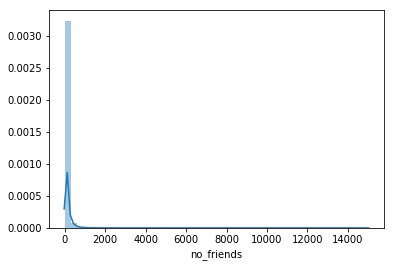

In [12]:
sns.distplot(df['no_friends'])

In [14]:
import pandas_profiling

In [15]:
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(df)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec

In [17]:
profile

Number of variables,23
Number of observations,1637138
Total Missing (%),0.0%
Total size in memory,287.3 MiB
Average record size in memory,184.0 B
Numeric,11
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,7
